In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
import pathlib

In [3]:
try:
    import matplotlib_views as views
except ModuleNotFoundError:
    cwd = pathlib.Path().resolve().parent
    sys.path.append(str(cwd))
    import matplotlib_views as views

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
import matplotlib.patheffects as PathEffects
from matplotlib import patheffects
from matplotlib import ticker
from matplotlib import rcParams
import matplotlib

In [7]:
from matplotlib_views import histograms
from matplotlib_views import formats
from matplotlib_views import styles

## Create some fake data

Teaching style is good when fake data is used. E.g. not to be read out explicit 


In [8]:
# Set presentation dimensions
# views.set_global_style()

## Empty example figure

In [ ]:
# with plt.xkcd():
#fig = plt.figure()
#ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))

fig, ax = views.get_plot()

ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim([-30, 10])

data = np.ones(100)
data[70:] -= np.arange(30)

ax.annotate(
    'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
    xy=(70, 1), arrowprops=dict(arrowstyle='->', lw=2), xytext=(15, -10), size=20,
    path_effects=[patheffects.withStroke(linewidth=3, foreground="w")]
)

ax.plot(data)

ax.set_xlabel(r'time $\rightarrow$')
#ax.set_xlabel(r'$\rho/\rho_{ref}\;\rightarrow$', color='red')
ax.set_ylabel(r'my overall health $\rightarrow$')
fig.text(
    0.5,
    0.05,
    '"Stove Ownership" from xkcd by Randall Munroe',
    ha='center'
)

## Predicted vs Actual

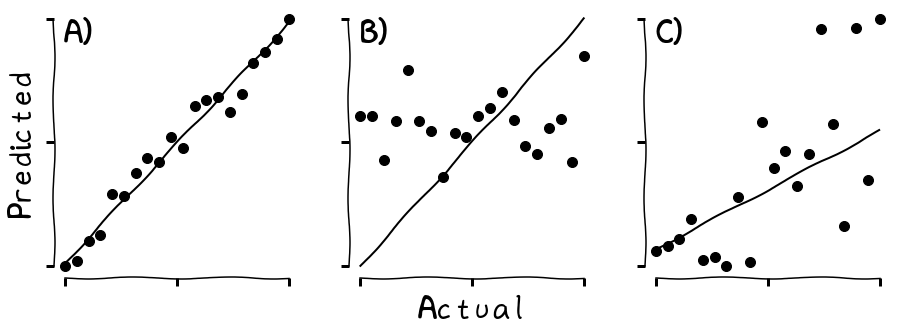

In [9]:

@styles.use_teach
def predicted_vs_actual():
    
    # Data
    x_axis = np.arange(-10, 10)
    n_points = len(x_axis)
    
    predictions_a = np.random.normal(loc=0.0, scale=1, size=n_points) + x_axis
    predictions_b = np.random.normal(loc=0.0, scale=2, size=n_points)
    predictions_c = (
        np.random.normal(loc=0.0, scale=0.5, size=n_points)*np.linspace(1, 30, n_points) + x_axis
    )
    predictions = [predictions_a, predictions_b, predictions_c]
    
    size = 5
    n_ax = len(predictions)
    
    fig, axs = plt.subplots(
        1,
        n_ax,
        sharey=False,
        sharex=False,
        figsize=(n_ax * size, size),
    )

    for ax, data in zip(axs, predictions):

        x_ticks = styles.simple_ticks(x_axis)
        y_ticks = styles.simple_ticks(list(data)+list(x_ticks))
        
        ax.set_xticks(x_ticks)
        ax.set_yticks(y_ticks)
        
        ax.plot(x_axis, x_axis, "k-")
        ax.scatter(x_axis, data, c="k")
    
    
    axs[0].set_ylabel("Predicted")
    axs[1].set_xlabel("Actual")
    
    styles.name_axes(axs, loc="top right")
    styles.simple_axes(axs)
    
predicted_vs_actual()

## Residual vs Predicted

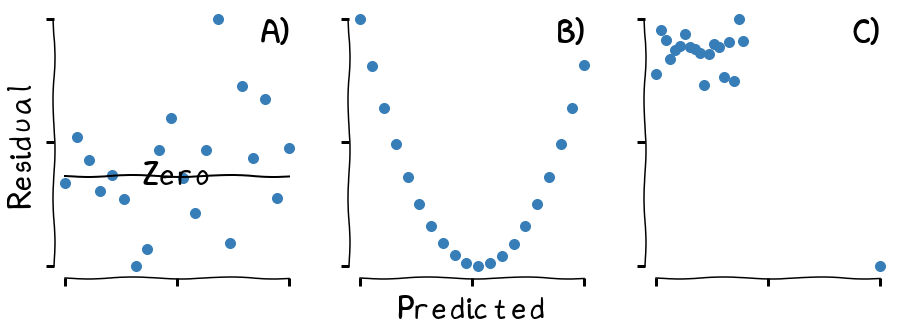

In [10]:
@styles.use_teach
def residual_vs_predicted(a):
    
    size = 5
    n_ax = 3
    
    fig, axs = plt.subplots(
        1,
        n_ax,
        sharey=False,
        sharex=False,
        figsize=(n_ax * size, size),
    )

    x_axis = np.arange(-10, 10)
    n_points = len(x_axis)

    # A
    mu, sigma = 0, 0.1 # mean and standard deviation
    residuals_random = np.random.normal(mu, sigma, n_points)
    x_ticks = styles.simple_ticks(x_axis)
    
    # Zero line
    axs[0].plot(x_ticks, [0.0]*3, 'k-')
    axs[0].text(np.mean(x_ticks), 0.0, "Zero", horizontalalignment='center', verticalalignment='center')
    
    axs[0].scatter(x_axis, residuals_random)
    axs[0].set_ylabel("Residual")
    axs[0].set_xticks(x_ticks)
    axs[0].set_yticks(styles.simple_ticks(residuals_random))
    #axs[0].text(0.9, 0.9, 'A)', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)
    

    # B
    mu, sigma = 0, 0.1 # mean and standard deviation
    residuals_nonlinear = x_axis**2 + np.random.normal(mu, sigma, n_points)
    axs[1].scatter(x_axis, residuals_nonlinear)
    axs[1].set_xlabel("Predicted")
    axs[1].set_xticks(styles.simple_ticks(x_axis))
    axs[1].set_yticks(styles.simple_ticks(residuals_nonlinear))

    # C
    mu, sigma = 0, 0.1 # mean and standard deviation
    residuals_nonlinear = np.random.normal(mu, sigma, n_points)
    residuals_nonlinear[-1] = -1
    x_axis_limit = x_axis/4
    x_axis_limit[-1] = x_axis[-1]
    axs[2].scatter(x_axis_limit, residuals_nonlinear)
    axs[2].set_xticks(styles.simple_ticks(x_axis_limit))
    axs[2].set_yticks(styles.simple_ticks(residuals_nonlinear))

    # Dumb axes
    styles.name_axes(axs)
    styles.simple_axes(axs)

residual_vs_predicted("5")

Plotted is the residual (regression error ($Residual = Observed - Predicted$)) vs predicted values. A) A good fit will show the values bounce randomly around zero. B) The model doesn't describe how property behave as x changes, could be non-linear data fitted to linear model. C) Indication of property cliffs/outliers, with uneven data distribution.

## Data distribution

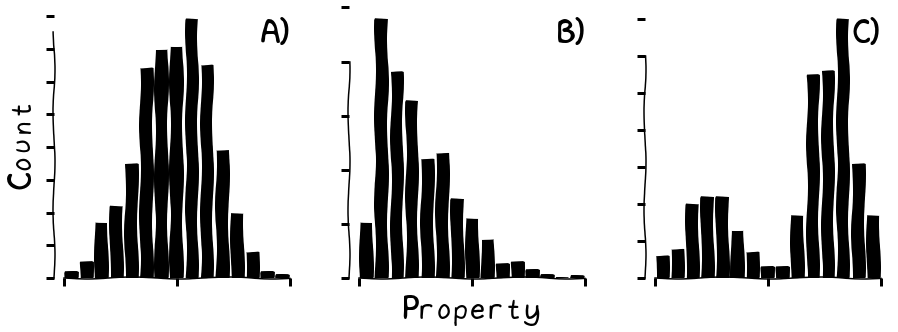

In [11]:
@styles.use_teach
def data_distribution():
    
    size = 5
    n_ax = 3
    
    fig, axs = plt.subplots(
        1,
        n_ax,
        sharey=False,
        sharex=False,
        figsize=(n_ax * size, size),
    )
    hist_kwargs = dict(bins=15, color="k", rwidth=0.85,)  
    
    data_a = np.random.normal(size=500, scale=1)
    data_b = (
        np.random.normal(loc=0.0, size=2_000, scale=10)
    )
    data_b = data_b[np.where(data_b > 0.1)]
    data_b = list(data_b) + list(np.random.normal(loc=0.0, size=100))
    
    data_c = (
        list(np.random.normal(loc=10.0, size=250, scale=2)) +
        list(np.random.normal(scale=2, loc=0.0,size=100))
    )
    
    data_list = [data_a, data_b, data_c]
    
    for ax, data in zip(axs, data_list):
        ax.hist(data, **hist_kwargs)
        ax.set_xticks(styles.simple_ticks(data))
    
    axs[0].set_ylabel("Count")
    axs[1].set_xlabel("Property")
    
    # Dumb axes
    styles.name_axes(axs)
    styles.simple_axes(axs)
    
    
data_distribution()

## Varience Explanined

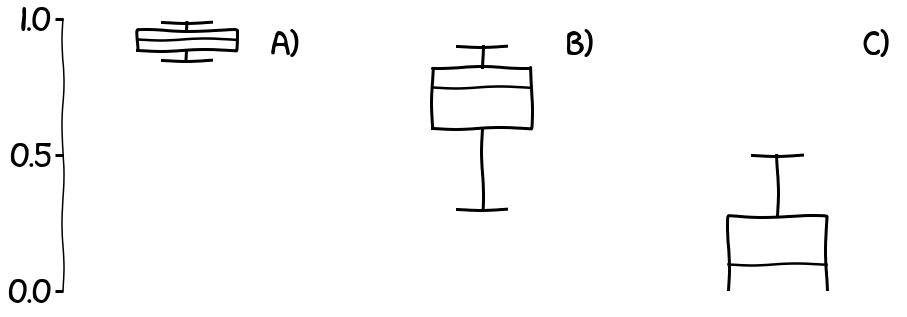

In [29]:

def residual(y_pred, y_true):
    return y_pred - y_true

def variance_explained(y_pred, y_true):
    res = residual(y_pred, y_true)
    ve = 1 - np.var(res) / np.var(y_true)
    return ve

n_points = 5

truth = np.random.random(n_points)*10
predictions = np.random.random(n_points)*5

variance_explained(predictions, truth)

@styles.use_teach
def varience_explained_plot():
    
    _lineprops = dict(linestyle='-', linewidth=3, color='k')
    _lineprops_mean = dict(linestyle='-', linewidth=2.5, color='k', zorder=0)
    
    kwargs = dict(
        boxprops=_lineprops, capprops=_lineprops, whiskerprops=_lineprops,
        medianprops=_lineprops_mean,
        widths=0.4,
    )
    
    # Data
    x_axis = np.arange(-10, 10)
    n_points = len(x_axis)
    
    data_a = [0.95, 0.9, 0.85, 0.99]
    data_b = [0.9, 0.3, 0.7, 0.8]
    data_c = [-1, 0.0, 0.5, 0.2]
    datas = [data_a, data_b, data_c]
    
    size = 5
    n_ax = len(datas)
    
    fig, axs = plt.subplots(
        1,
        n_ax,
        sharey=True,
        sharex=False,
        figsize=(n_ax * size, size),
    )

    for ax, data in zip(axs, datas):
        ax.boxplot(data, **kwargs)
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
        views.utils.fix_borders(ax, visibles=[False, False, False, False])
    
    y_ticks = styles.simple_ticks([1.0, 0.0])
    axs[0].axes.yaxis.set_visible(True)
    axs[0].set_yticks(y_ticks)
    axs[0].set_ylim((0.0, 1.0))
    views.utils.fix_borders(axs[0], visibles=[False, False, False, True])
    
    ax.tick_params(axis='y', labelsize=0.5)
    #axs[0].set_ylabel("Predicted")
    #axs[1].set_xlabel("Actual")
    
    styles.name_axes(axs)
    # styles.simple_axes(axs)
    
varience_explained_plot()

# Different CV splits!


## Learning curves

In [ ]:
from matplotlib_views import vapnik as vapnik_views

In [ ]:
with plt.xkcd():
    fig, ax = views.get_plot()

mu, sigma = 0, 0.5

training_set_size = [2**x for x in range(1, 10)]
training_set_size = np.linspace(1, 512, 50)

training_set_size = np.array(training_set_size)
N = len(training_set_size)

error_training = training_set_size
error_validation = 1/training_set_size

s = np.random.normal(mu, sigma, N)
scale = 6.0/np.arange(1, N+1)
s *= scale
error_training = 5*np.log(error_training) + s

s = np.random.normal(mu, sigma, N)
scale = 6.0/np.arange(1, N+1)
s *= scale
error_validation = 5*np.log(error_validation) + 64 + s

ax.plot(training_set_size, error_training, "k--")
ax.plot(training_set_size, error_validation, "k--")

ax.set_ylabel("error")
ax.set_xlabel("training set size")

ykeys = [0, 30.0, 60]
xkeys = [10, 150, 300, 500]

vapnik_views.learning_curve_error(ax, xkeys, ykeys,
    x_range=(-20, 500),
    y_range=(-5, 60),
    loglog=False)

plt.xticks([])
plt.yticks([])

font = {"family": "xkcd", "fontsize":15}


txt_train = "Learning for training set".lower()
txt_valid = "Learning for validation set".lower()
ax.text(150, 50, txt_valid, **font)
ax.text(150, 10, txt_train, **font)

# ax.arrow(20, 10, 20, 0, head_width=2, head_length=4, head_starts_at_zero=True)

pass

blah blah blah learning curves

In [ ]:
np.random.seed(999)

plt.rc('path', effects=[PathEffects.withStroke(linewidth=4, foreground="w")])

def get_error(N,a,b):
    error = a/N**b
    return error

def get_error_bad(N, a, b, offset, noise=0.2):
    error = a/N**b * (1-np.random.normal(0, noise, 1)) + offset
    return error

with plt.xkcd():
    fig, ax = views.get_plot()

mu, sigma = 0, 0.5

training_set_size = [10**x for x in range(1, 8)]
training_set_size = np.array(training_set_size)
N = len(training_set_size)

# error_training = 5/training_set_size
#
# s = np.random.normal(mu, sigma, N)
# scale = 6.0/np.arange(1, N+1)
# s *= scale
# error_training += 64 + s

offset = 10

error_training = [get_error_bad(x,600,0.3,100) for x in training_set_size]
error_training = np.array(error_training)
error_a = np.array([get_error_bad(x,10_000,0.7, 5.0) for x in training_set_size])
error_b = np.array([get_error_bad(x,10_000,0.7,1.0) for x in training_set_size])

ax.plot(training_set_size, error_training)
ax.plot(training_set_size, error_a+1.0)
ax.plot(training_set_size, error_b)

# Models End
model_names = ["A", "B", "C"]
end_points = []
end_points.append(error_training[-1])
end_points.append(error_a[-1])
end_points.append(error_b[-1])

for name, point in zip(model_names, end_points):

    font = {
        "family": "xkcd",
        "fontsize":15,
        "horizontalalignment": 'right',
        "verticalalignment": 'center',
    }
    txtobj = ax.text(10**7, point, name, **font)
    txtobj.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])

# lines

line_data = [10]*N
line_data = np.array(line_data) + np.random.normal(0,0.5,N)
lineobj = ax.plot(training_set_size, line_data, "k--")

yticks = [0.1, 1.0, 10, 100, 10**3, 10**4]
line_data_y = np.array(yticks)
line_data_x = np.array([10**4]*line_data_y.shape[0]) * (1- np.random.normal(0,0.05,line_data_y.shape[0]))
lineobj = ax.plot(line_data_x, line_data_y, "k", linestyle="dotted")

yticks = [0.1, 1.0, 10, 100, 10**3, 10**4]
line_data_y = np.array(yticks)
line_data_x = np.array([10**5]*line_data_y.shape[0]) * (1- np.random.normal(0,0.05,line_data_y.shape[0]))
lineobj = ax.plot(line_data_x, line_data_y, "k", linestyle="dotted")


lineobj[0].set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])

# text

font = {
    "family": "xkcd",
    "fontsize":15,
    "horizontalalignment": 'center',
    "verticalalignment": 'center',
}

txt_valid = "target error".lower()
txtobj = ax.text(10**2, 10**1, txt_valid, **font)
txtobj.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])

txt_valid = "data avail.".lower()
txtobj = ax.text(10**4, 10**3, txt_valid, **font)
txtobj.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])

txt_valid = "data need.".lower()
txtobj = ax.text(10**5, 10**3.5, txt_valid, **font)
txtobj.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])


# labels
ax.set_ylabel("error")
ax.set_xlabel("experience")

# ticks
yticks = [10**x for x in range(1, 8)]
plt.yticks(yticks)



ykeys = [1, 10.0, 100, 1000, 10**4]
xkeys = [10**x for x in range(1,8)]
# mpl_lc.learning_curve_error(ax, xkeys, ykeys)

# plt.xticks([])
# plt.yticks([])

font = {"family": "xkcd", "fontsize":15}


# txt_train = "Learning for training set".lower()
# txt_valid = "Learning for validation set".lower()
# ax.text(150, 50, txt_valid, **font)
# ax.text(150, 10, txt_train, **font)

# ax.arrow(20, 10, 20, 0, head_width=2, head_length=4, head_starts_at_zero=True)


ax.set_xscale('log')
ax.set_yscale('log')
ax.minorticks_off()

ax.set_xlim((5, max(xkeys)*(1+0.1)))
ax.set_ylim((5*10**-1, max(ykeys)))

border = [False, False, True, True]
spines = ax.spines.items()
for direction, spine in spines:
    if direction == "top":
        spine.set_visible(border[0])

    if direction == "right":
        spine.set_visible(border[1])

    if direction == "bottom":
        spine.set_visible(border[2])
        spine.set_bounds(min(xkeys), max(xkeys))

    if direction == "left":
        spine.set_visible(border[3])
        spine.set_bounds(min(ykeys), max(ykeys))

detail learning curve ex

## Data Distribution

Data distribution

For any model building, it is important to understand the structure of the underlying data. Typically, a normal or distribution (a) is resulting in more stable local models as sampling from such a set of observations leads to well behaved data sets for learning. Other distribution types often found in drug discovery analyzes such as skewed (b) or multimodal (c; e.g. bimodal often appear in solubility measurements) distributions overemphasize one type of observation and may lead to learning artifacts instead of actual relations in the data.

Apart from the distribution type, the actual width of the distribution is important. In order to model differences in the data, it is important to have a good spread of observed values. For activity data a spread of

image.png


image.png


image.png



Actual vs Predicted


Residuals vs Actual
result: np.ndarray = y_pred - y_true


Variance Explained

return 1 - np.var(residual(y_pred, y_true)) / var  # type: ignore

